In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

%matplotlib inline
rcParams['figure.figsize'] = 15, 8

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
print('Shape ', df.shape)
print('Columns ', df.columns)

Shape  (4238, 16)
Columns  Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# **Checking datatypes of all variables**
There are wrong datatypes assigned to particular columns. For example we see that "education" is float but it is nominal so we have to convert such a wrong data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Some independent variables like totChol or dialBP may have outliers

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


It is required to convert wrong datatypes to one of two datatypes float or category. Conversion below.

In [6]:
category_types = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', "TenYearCHD"]
contunous_type =['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for i in df.columns:
    if i in category_types:
        df[i] = df[i].astype('category')
    if i in contunous_type:
        df[i] = df[i].astype('float')  

Verification of conversion result. Now datatypes meet our expectations.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             4238 non-null   category
 1   age              4238 non-null   float64 
 2   education        4133 non-null   category
 3   currentSmoker    4238 non-null   category
 4   cigsPerDay       4209 non-null   float64 
 5   BPMeds           4185 non-null   category
 6   prevalentStroke  4238 non-null   category
 7   prevalentHyp     4238 non-null   category
 8   diabetes         4238 non-null   category
 9   totChol          4188 non-null   float64 
 10  sysBP            4238 non-null   float64 
 11  diaBP            4238 non-null   float64 
 12  BMI              4219 non-null   float64 
 13  heartRate        4237 non-null   float64 
 14  glucose          3850 non-null   float64 
 15  TenYearCHD       4238 non-null   category
dtypes: category(8), float64(8)
memory usage: 2

# Checking for missing values

In [8]:
# checking NaN values
print(df.isna().sum(), '\n')

# checking percentage on NaNs for each variable including NaN values
num=0
for i in list(df.isna().sum()):
    if i>0:
        print(f'Percentage of NaNs in {df.columns[num]} ', round((df[df.columns[num]].isna().sum())/(len(df))*100,2), '%')
    num+=1

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64 

Percentage of NaNs in education  2.48 %
Percentage of NaNs in cigsPerDay  0.68 %
Percentage of NaNs in BPMeds  1.25 %
Percentage of NaNs in totChol  1.18 %
Percentage of NaNs in BMI  0.45 %
Percentage of NaNs in heartRate  0.02 %
Percentage of NaNs in glucose  9.16 %


In [9]:
df.loc[:,['glucose']]

,glucose
0,77.0
1,76.0
2,70.0
3,103.0
4,85.0
...,...
4233,86.0
4234,68.0
4235,86.0
4236,NaN


In [10]:
df.dropna(inplace=True)

In [11]:
columns = df.columns
for i in columns:
    print(i)
    print(df[i].unique(), '\n')

male
[1, 0]
Categories (2, int64): [0, 1] 

age
[39. 46. 48. 61. 43. 63. 45. 52. 50. 41. 38. 42. 44. 47. 35. 60. 36. 59.
 54. 37. 53. 49. 65. 51. 62. 40. 56. 67. 57. 66. 64. 55. 58. 68. 34. 33.
 32. 70. 69.] 

education
[4.0, 2.0, 1.0, 3.0]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0] 

currentSmoker
[0, 1]
Categories (2, int64): [0, 1] 

cigsPerDay
[ 0. 20. 30. 23. 15. 10.  5. 35. 43.  1. 40.  3.  9.  2. 12.  4. 18. 60.
 25. 45.  8. 13. 11.  7.  6. 38. 50. 29. 17. 16. 19. 70. 14.] 

BPMeds
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0] 

prevalentStroke
[0, 1]
Categories (2, int64): [0, 1] 

prevalentHyp
[0, 1]
Categories (2, int64): [0, 1] 

diabetes
[0, 1]
Categories (2, int64): [0, 1] 

totChol
[195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 221.
 232. 291. 190. 234. 215. 270. 272. 295. 226. 209. 214. 178. 233. 180.
 243. 237. 311. 208. 252. 261. 179. 267. 216. 240. 266. 255. 185. 220.
 235. 212. 223. 300. 302. 175. 189. 258. 202. 183. 274. 170. 210. 197.
 326. 1

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


# Checking that out target variable is binary

0    3099
1     557
Name: TenYearCHD, dtype: int64


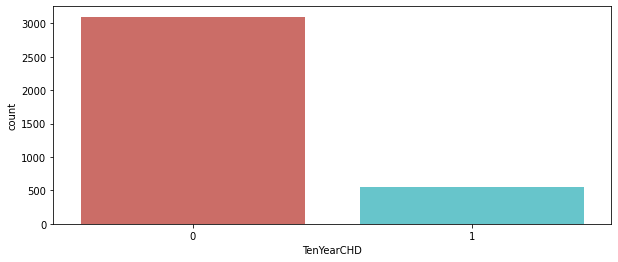

In [12]:
rcParams['figure.figsize'] = 10, 4
sns.countplot(x='TenYearCHD', data=df, palette='hls')
print(df['TenYearCHD'].value_counts())

# Checking for outliers in continuous variables

There is many outliers in almost each variable, we neet to get rid of all values that are higher than Q3 + 1,5IQR

<AxesSubplot:>

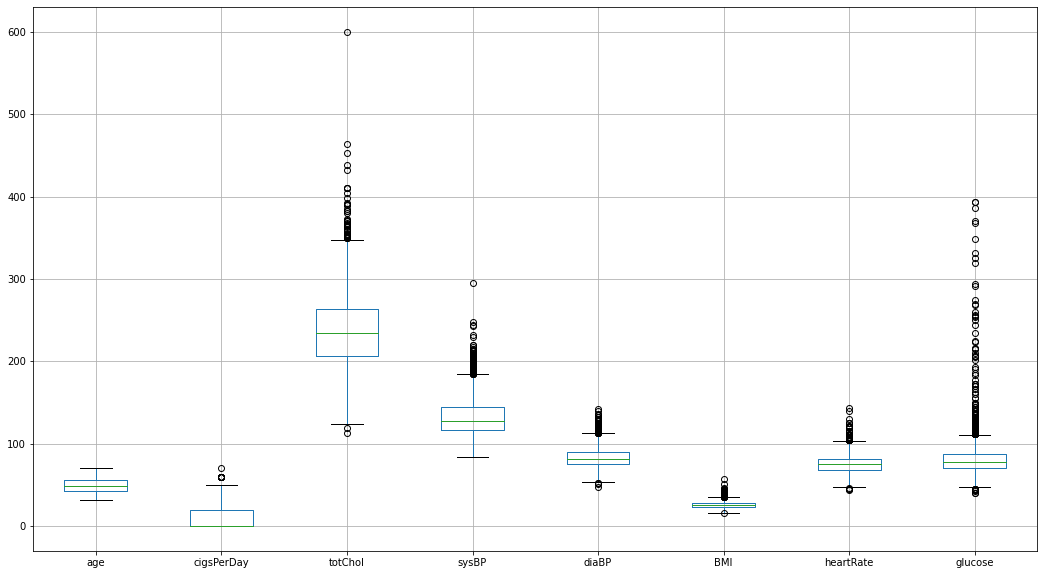

In [13]:
rcParams['figure.figsize'] = 18, 10
contunous_type =['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df.boxplot(column=contunous_type)


We are going to drop all rows with variables including outliers, code performing this task below.

In [14]:
contunous_type =['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for i in contunous_type:
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[i] < min,i] = np.nan
    df.loc[df[i] > max,i] = np.nan
    
df = df.dropna()

<AxesSubplot:>

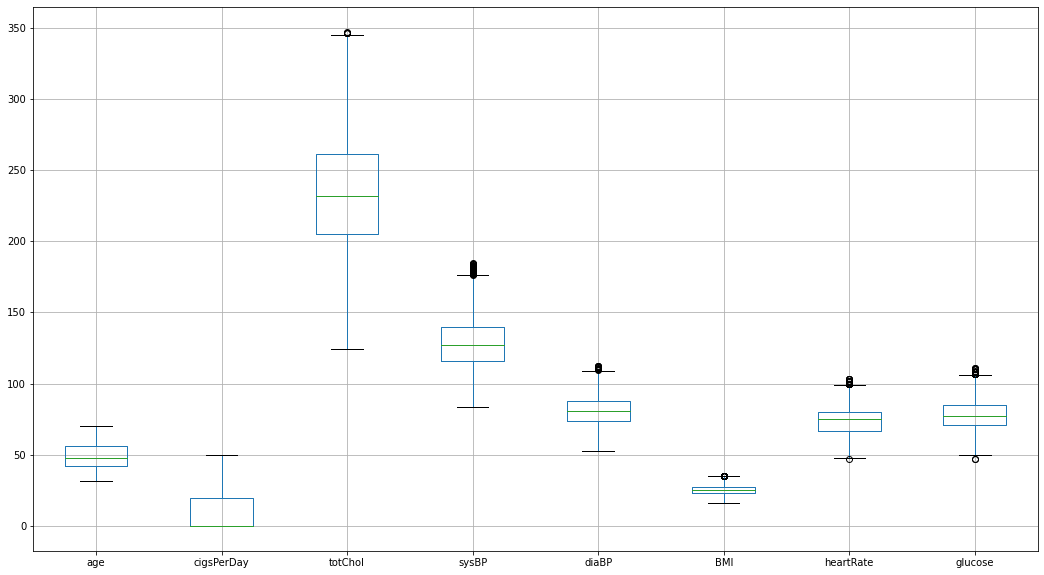

In [15]:
rcParams['figure.figsize'] = 18, 10
contunous_type =['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df.boxplot(column=contunous_type)

In [16]:
#checking correlations between continuous variables
columns = df.columns
X=df[columns]
corr = X.corr()
corr.style.background_gradient(cmap='Greens')

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.181227,0.275804,0.368350,0.188206,0.130264,-0.031059,0.083044
cigsPerDay,-0.181227,1.000000,-0.029488,-0.075549,-0.048027,-0.077908,0.076775,-0.079615
totChol,0.275804,-0.029488,1.000000,0.212601,0.199039,0.155761,0.091317,0.020656
sysBP,0.368350,-0.075549,0.212601,1.000000,0.764532,0.275298,0.152277,0.078883
diaBP,0.188206,-0.048027,0.199039,0.764532,1.000000,0.338142,0.159064,0.023749
BMI,0.130264,-0.077908,0.155761,0.275298,0.338142,1.000000,0.044431,0.059892
heartRate,-0.031059,0.076775,0.091317,0.152277,0.159064,0.044431,1.000000,0.074729
glucose,0.083044,-0.079615,0.020656,0.078883,0.023749,0.059892,0.074729,1.000000


In [17]:
#df = df.drop(['diaBP', 'heartRate'], 1)

In [18]:
import scipy.stats as stats

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = stats.chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = np.min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
   # V = np.sqrt((stat*mini/obs))
    return (stat/(obs*mini))

In [19]:
category_types = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
rows= []

for var1 in category_types:
  col = []
  for var2 in category_types:
    cramers = cramers_V(df[var1], df[var2]) # Cramer's V test
    col.append(round(cramers, 2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
cramers_results

d = pd.DataFrame(cramers_results, columns = category_types, index =category_types)

d

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
male,1.00,0.02,0.04,0.00,0.00,0.00,0.00,0.01
education,0.02,1.00,0.00,0.00,0.00,0.01,0.00,0.01
currentSmoker,0.04,0.00,1.00,0.00,0.00,0.01,0.00,0.00
BPMeds,0.00,0.00,0.00,0.98,0.00,0.06,0.00,0.00
prevalentStroke,0.00,0.00,0.00,0.00,0.94,0.00,0.00,0.00
prevalentHyp,0.00,0.01,0.01,0.06,0.00,1.00,0.00,0.02
diabetes,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.00
TenYearCHD,0.01,0.01,0.00,0.00,0.00,0.02,0.00,1.00


We see strong correlation between dialBP and sysBP, these variables should be independent so we neet do remove one of these.

# Converting categorical variable to a dummy indicator
In out dataset only one categorical variable is not binary, it is 'education', we have to convert it using get_dummies function.

In [20]:
education_dmy = pd.get_dummies(df['education'], prefix='education', columns=['4', '2', '1', '3']).astype('float')
df = df.drop('education', 1)
df_dmy = pd.concat([df, education_dmy], axis=1)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [21]:
#checking correlations 
columns = df_dmy.columns
X=df_dmy[columns]
corr = X.corr()
corr.style.background_gradient(cmap='Greens')

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0
age,1.000000,-0.181227,0.275804,0.368350,0.188206,0.130264,-0.031059,0.083044,0.219113,-0.183227,-0.023698,-0.042343
cigsPerDay,-0.181227,1.000000,-0.029488,-0.075549,-0.048027,-0.077908,0.076775,-0.079615,-0.018437,0.040564,-0.041701,0.018394
totChol,0.275804,-0.029488,1.000000,0.212601,0.199039,0.155761,0.091317,0.020656,0.031002,-0.042102,0.010487,0.000931
sysBP,0.368350,-0.075549,0.212601,1.000000,0.764532,0.275298,0.152277,0.078883,0.127081,-0.043357,-0.058106,-0.062390
diaBP,0.188206,-0.048027,0.199039,0.764532,1.000000,0.338142,0.159064,0.023749,0.056040,-0.022094,-0.032501,-0.015370
BMI,0.130264,-0.077908,0.155761,0.275298,0.338142,1.000000,0.044431,0.059892,0.132318,-0.063264,-0.062855,-0.036609
heartRate,-0.031059,0.076775,0.091317,0.152277,0.159064,0.044431,1.000000,0.074729,0.010303,0.047640,0.000167,-0.083064
glucose,0.083044,-0.079615,0.020656,0.078883,0.023749,0.059892,0.074729,1.000000,-0.008332,-0.007040,0.021633,-0.002487
education_1.0,0.219113,-0.018437,0.031002,0.127081,0.056040,0.132318,0.010303,-0.008332,1.000000,-0.544610,-0.370614,-0.303053
education_2.0,-0.183227,0.040564,-0.042102,-0.043357,-0.022094,-0.063264,0.047640,-0.007040,-0.544610,1.000000,-0.302997,-0.247763


In [22]:
df_dmy.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0.0,0.0,0.0,1.0
1,0,46.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0.0,1.0,0.0,0.0
2,1,48.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1.0,0.0,0.0,0.0
3,0,61.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0.0,0.0,1.0,0.0
4,0,46.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0.0,0.0,1.0,0.0


In [23]:
df_dmy.shape

(3194, 19)

In [24]:
from imblearn.over_sampling import SMOTE

#X = df_dmy.loc[:, ['male', 'prevalentHyp', 'age', 'sysBP', 'education_1.0', 'education_2.0', 'education_3.0', 'education_4.0']]
X = df_dmy.drop('TenYearCHD', axis=1)
y = df_dmy['TenYearCHD']

os = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
columns = X_train.columns

#oversample = SMOTE()
X_train_smote, y_train_smote = os.fit_resample(X_train.astype('float'), y_train)


dfx_train_smote = pd.DataFrame(data = X_train_smote, columns= columns )
dfy_train_smote= pd.DataFrame(data = y_train_smote, columns=['TenYearCHD'])


# we can Check the numbers of our data
print("length of oversampled data is ",len(dfx_train_smote))
print("Number of no subscription in oversampled data",len(dfy_train_smote[dfy_train_smote['TenYearCHD']==0]))
print("Number of subscription",len(dfy_train_smote[dfy_train_smote['TenYearCHD']==1]))
print("Proportion of no subscription data in oversampled data is ",len(dfy_train_smote[dfy_train_smote['TenYearCHD']==0])/len(dfx_train_smote))
print("Proportion of subscription data in oversampled data is ",len(dfy_train_smote[dfy_train_smote['TenYearCHD']==1])/len(dfx_train_smote))

length of oversampled data is  3896
Number of no subscription in oversampled data 1948
Number of subscription 1948
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [25]:
# X = df_dmy.drop('TenYearCHD', axis=1)
# y = df_dmy['TenYearCHD']
#X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=42)
#columns = X_train.columns


# Deploying and evaluating the model

In [26]:
LogReg = LogisticRegression(solver = 'newton-cg')
LogReg.fit(X_train_smote, y_train_smote)

LogisticRegression(solver='newton-cg')

In [27]:
y_pred = LogReg.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       821
           1       0.25      0.60      0.35       138

    accuracy                           0.68       959
   macro avg       0.58      0.65      0.57       959
weighted avg       0.82      0.68      0.72       959



# Confusion Matrix Evaluation Metrics

In [29]:
y_train_pred = cross_val_predict(LogReg, X_train_smote, y_train_smote, cv=5)
confusion_matrix(y_train_smote, y_train_pred)

array([[1338,  610],
       [ 516, 1432]])

In [30]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6798748696558915
Precision: 0.24776119402985075
Recall: 0.6014492753623188


# ROC Curve

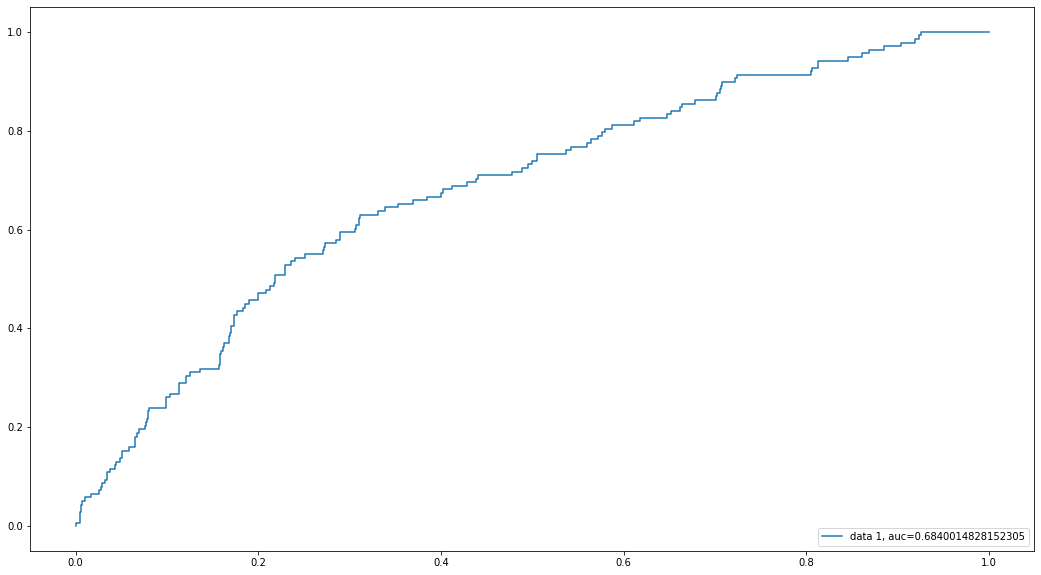

In [31]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()